***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-engineering:-Numeric-Data-(continued)" data-toc-modified-id="Feature-engineering:-Numeric-Data-(continued)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature engineering: Numeric Data (continued)</a></span><ul class="toc-item"><li><span><a href="#Interactions-(continued)" data-toc-modified-id="Interactions-(continued)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Interactions (continued)</a></span></li><li><span><a href="#Regression-and-linearity-of-training-models" data-toc-modified-id="Regression-and-linearity-of-training-models-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regression and linearity of training models</a></span></li><li><span><a href="#Polynomial-features" data-toc-modified-id="Polynomial-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Polynomial features</a></span><ul class="toc-item"><li><span><a href="#Polynomial-feature-transformation-of-higher-orders" data-toc-modified-id="Polynomial-feature-transformation-of-higher-orders-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Polynomial feature transformation of higher orders</a></span></li><li><span><a href="#How-many-features-for-polynomial-transformations?" data-toc-modified-id="How-many-features-for-polynomial-transformations?-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>How many features for polynomial transformations?</a></span></li><li><span><a href="#Generic-non-linear-transformation-of-the-features" data-toc-modified-id="Generic-non-linear-transformation-of-the-features-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Generic non-linear transformation of the features</a></span></li><li><span><a href="#Interaction-in-the-Pokemon-dataset-(classification)" data-toc-modified-id="Interaction-in-the-Pokemon-dataset-(classification)-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Interaction in the Pokemon dataset (classification)</a></span></li></ul></li><li><span><a href="#Does-the-polynomial-transformation-work-(always)?" data-toc-modified-id="Does-the-polynomial-transformation-work-(always)?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Does the polynomial transformation work (always)?</a></span><ul class="toc-item"><li><span><a href="#Split-the-data-in-training-and-testing" data-toc-modified-id="Split-the-data-in-training-and-testing-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Split the data in training and testing</a></span></li><li><span><a href="#K-NN" data-toc-modified-id="K-NN-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>K-NN</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Polynomial-features,-Multiple-Linear-regression,-sklearn-tools" data-toc-modified-id="Polynomial-features,-Multiple-Linear-regression,-sklearn-tools-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Polynomial features, Multiple Linear regression, <code>sklearn</code> tools</a></span><ul class="toc-item"><li><span><a href="#Boston-house-price-dataset-(regression)" data-toc-modified-id="Boston-house-price-dataset-(regression)-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Boston house price dataset (regression)</a></span></li><li><span><a href="#Split-the-dataset-in-training-and-testing" data-toc-modified-id="Split-the-dataset-in-training-and-testing-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Split the dataset in training and testing</a></span></li><li><span><a href="#Multiple-Linear-regression-with-Ordinary-Least-Squares" data-toc-modified-id="Multiple-Linear-regression-with-Ordinary-Least-Squares-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Multiple Linear regression with Ordinary Least Squares</a></span></li><li><span><a href="#OLS-with-polynomial-features" data-toc-modified-id="OLS-with-polynomial-features-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>OLS with polynomial features</a></span></li><li><span><a href="#Automate-the-processes-using--pipeline" data-toc-modified-id="Automate-the-processes-using--pipeline-1.5.5"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>Automate the processes using  <code>pipeline</code></a></span></li></ul></li></ul></li></ul></div>

# Feature engineering: Numeric Data (continued)

## Interactions (continued)

A model is usually built in such a way that we try to model the output responses (discrete classes or
continuous values) as a function of the input feature variables.

<u>Linear Regression:</u>

$$\hat{y}({\bf x}) = c_1x_1 + c_2x_2 + c_3x_3 + \ldots c_nx_n + c_0 = {\bf c}\cdot {\bf x}, \quad \text{with}\ x_0 = 1 $$

$${\bf c} = (c_0, c_1, c_2, \ldots, c_n), \quad {\bf x} = (1, x_1, x_2, \ldots, x_n)$$

This simple linear model assumes a <u>linear relationship</u> between the predicted output $\hat{y}$ and the inputs ${\bf x}$, purely based on the **individual, separate input features.**

However, often in several real-world datasets and scenarios, it makes sense to also try to capture the **interactions** between these feature variables as a part of the input feature set.

***
Note that in the expression above, the **linearity of the relation <u>for what regards the learning process</u> must be intended with respect to the coefficients $c_i, i=0, \ldots, n$** that must be learned using the training data.

At training time, the features $x_i$ are indeed *numeric parameters,* not the variables of the linear regression model!

<span style="color:red">The estimation problem consists in learning a predictor $\hat{y}({\bf x}) = {\bf c}\cdot {\bf x}$ based on a set of known values (*input parameters*) for the feature vectors ${\bf x}$. The <u>variables of the training model</u> are the elements of the coefficient vector ${\bf c}$.</span>
***

## Regression and linearity of training models

Let's consider a simple **univariate regression dataset**  

- Only one predictor variable/feature: <u>**single** regression problem</u><br><p>
- More than one predictor variable/feature: <u>**multiple** regression problem</u>

In [13]:
import numpy as np
import pandas as pd

X = np.array([[0.5, 1], [2, 0.7]])
df = pd.DataFrame(X, columns=['x1', 'y'])


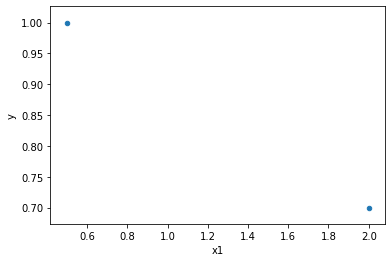

In [14]:
df.plot(x='x1', y='y', kind='scatter')

In [15]:
import scipy as sp
poly_order = 1
model_params, SSE, a, b, c = sp.polyfit(df['x1'], df['y'], poly_order, full=True)

print('Model params: {:.3f} (Slope), {:.3f} (Intercept)'
      ' - SSE: {:.3g}'.format(model_params[0], model_params[1], 
                              0 if len(SSE) == 0 else SSE[0]))
linear_model = sp.poly1d(model_params)
print(linear_model)  

Model params: -0.200 (Slope), 1.100 (Intercept) - SSE: 0
 
-0.2 x + 1.1


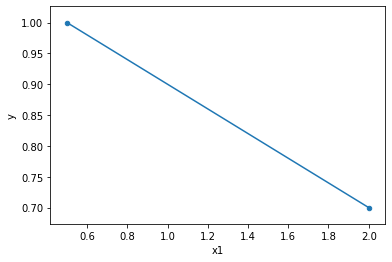

In [16]:
import matplotlib.pyplot as plt
df.plot(x='x1', y='y', kind='scatter')
plt.plot(df['x1'], linear_model(df['x1']))
plt.show()

In [17]:
df.loc[len(df)] = [1.5, 0.95] 

In [18]:
df

x1     y
0  0.5  1.00
1  2.0  0.70
2  1.5  0.95

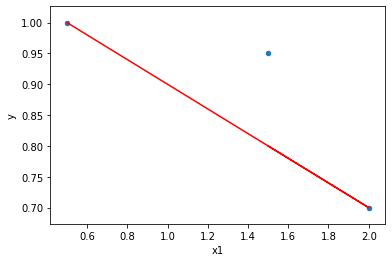

In [19]:
df.plot(x='x1', y='y', kind='scatter')
plt.plot(df['x1'], linear_model(df['x1']), color='r')
plt.show()

In [20]:
model_params, SSE, a, b, c = sp.polyfit(df['x1'], df['y'], poly_order, full=True)

print(SSE, model_params)
print('Model params: {:.3f} (Slope), {:.3f} (Intercept)'
      ' - SSE: {:.3g}'.format(model_params[0], model_params[1], 
                              (0 if len(SSE) == 0 else SSE[0])))
linear_model = sp.poly1d(model_params)
print(linear_model)  

[0.01446429] [-0.17857143  1.12142857]
Model params: -0.179 (Slope), 1.121 (Intercept) - SSE: 0.0145
 
-0.1786 x + 1.121


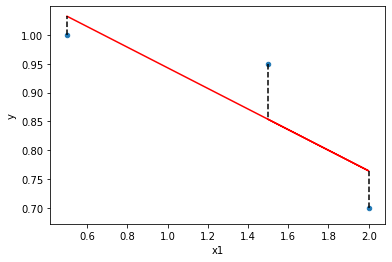

In [21]:
df.plot(x='x1', y='y', kind='scatter')
plt.plot(df['x1'], linear_model(df['x1']), color='r')
for i in range(len(df)):
    plt.plot([df.iloc[i,0], df.iloc[i,0]], 
         [df.iloc[i,1], linear_model(df.iloc[i,0])],color='black', 
         linestyle='--')
plt.show()

How do we solve the problem? i.e. how do we compute the good coefficients?

**Find the values of the coefficients that minimize the sum of the squared losses**

$$L({\bf c}) = \sum_{i=1}^{m} (y^{(i)} - {\bf c}\cdot {\bf x}^{(i)})^2 $$

In [22]:
df

x1     y
0  0.5  1.00
1  2.0  0.70
2  1.5  0.95

$$
\begin{aligned}
&x^{(0)} = (0.5), & &y^{(0)} = 1\\
&x^{(1)} = (2),  & &y^{(1)} = 0.7 \\
&x^{(2)} = (1.5), & &y^{(2)} = 0.95
\end{aligned}
$$

$$L({\bf c}) = (c_0 + c_1\cdot 0.5 - 1)^2 +  (c_0 + c_1\cdot 2 - 0.7)^2 + 
    (c_0 + c_1\cdot 1.5 - 0.95)^2$$

The values of the coefficients are found as the solutions of the **optimization problem:**<br>

$${\bf c} = \arg\min_{{\bf c}} L({\bf c})$$

where the *variables* are indeed the coefficients! The values of the features, the vector ${\bf x} = (0.5, 2, 1.5)$ plays the role of numeric parameter.

How do we get the final values:
- Take the (partial) derivatives of $L({\bf c})$ wrt $c_0$ and $c_1$<br><p>
- Find the values of $c_0$ and $c_1$ that set both the derivatives to 0 

... The final solution can be expressed in matrix form as:

$${\bf c} = ({\bf X}^T {\bf X})^{-1}{\bf y}$$

where ${\bf X}$ is the matrix with all feature data. 

In our simple univariate case is a vector, an $m\times 1$ matrix. If we have $n$ features, ${\bf X}$ becomes an $m\times n$ matrix.

<div>
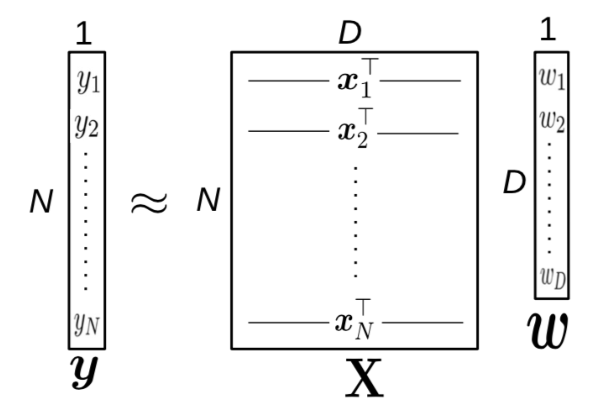
</div>

## Polynomial features

<u>Linear regression (with polynomial features):</u>

Let's consider interactions up to the **second order between the features,** i.e., of the type $x_ix_j$

This means that we need to add features including all interaction terms of the second order. If we keep the linear regression model, this means that we are considering a **polynomial of order two in the feature variables $x_i, \, i=0, \ldots, n$**

For instance, if originally we had 3 features, $x_1, x_2, x_3$, and we we want to extend the feature set by adding all the interaction terms up to the second order in the linear regression model:

$$y = c_1x_1 + c_2x_2 + c_3x_3 + c_0 + c_{11}x_1^2 + c_{22}{x_2}^2 + c_{33}x_3^2 + c_{12}x_1x_2 + c_{13}x_1x_3 + c_{23}x_2x_3$$

- We passed from a set of 3 features (the original ones in the dataset), $\{x_1, x_2, x_3\}$, to a new set of 9 features: $\{x_1, x_2, x_3, x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3\}$

- Accordingly, we passed from the problem of learning 4 parameters, $c_i, i=0, \ldots, 3$, to the problem of learning 10 parameters: $\{c_0, c_1, c_2, c_3, c_{11}, c_{22}, c_{33}, c_{12}, c_{13}, c_{23}\}$

<span style="color:red">Note that even using polynomially transformed features, we are still considering a <u>linear regression problem in the coefficients ${\bf c}$.</u></span>

### Polynomial feature transformation of higher orders

In more general terms, we can consider **interactions up to any order $n > 1$ among the feature variables.**

In other words, we can **transform the original features according to any desired polynomial.**

Of course, while this will make our model potentially more powerful, will also increase the number of features and, accordingly, the number of parameters to learn.

For instance, if we consider an original two-dimensional feature space, $\{x_1, x_2\}$, and a polynomial transformation of order 4: 

$$\hat{y} = c_1x_1^4 + c_2x_2^4 + c_3x_1^3x_2 + c_4x_1x_2^3 + c_5x_1^2x_2^2 + c_6x_1^3 + c_7x_2^3 + c_{8}x_1x_2^2 + c_{9}x_1^2x_2 + c_{10}x_1^2 + c_{11}x_2^2 + c_{12}x_1x_2 + c_{13}x_1 + c_{14}x_2 + c_{15}$$

Now we have 15 parameters to learn!

### How many features for polynomial transformations?

If we consider the transformation to **polynomial feature of degree exactly $d$** (i.e., only the terms of precisely order $n$ are considered), for the case of an original feature space of dimension $n$ (i.e., originally we have $n$ features), the number of polynomial terms of precisely degree $d$ is:

$$\# \text{terms of degree}\ d = \binom{d+n-1}{d} = \frac{(d+n-1)!}{d!(n-1)!}$$

For relatively large $n$ the number grows as $O(n^d)$

E.g., for $n=3, d=2$, the number of terms is 9 (including all crossed terms, that is, $x_1x_2$ as well as $x_2x_1$): $\{x_1^2, x_2^2, x_3^2, x_1x_2, x_2x_1, x_1x_3, x_3x_1, x_2x_3, x_3x_3\}$

<span style="color:red">E.g., for $n=100, d=6$, we get about 1.6 billion terms: a huge feature space!!!</span>

<div>
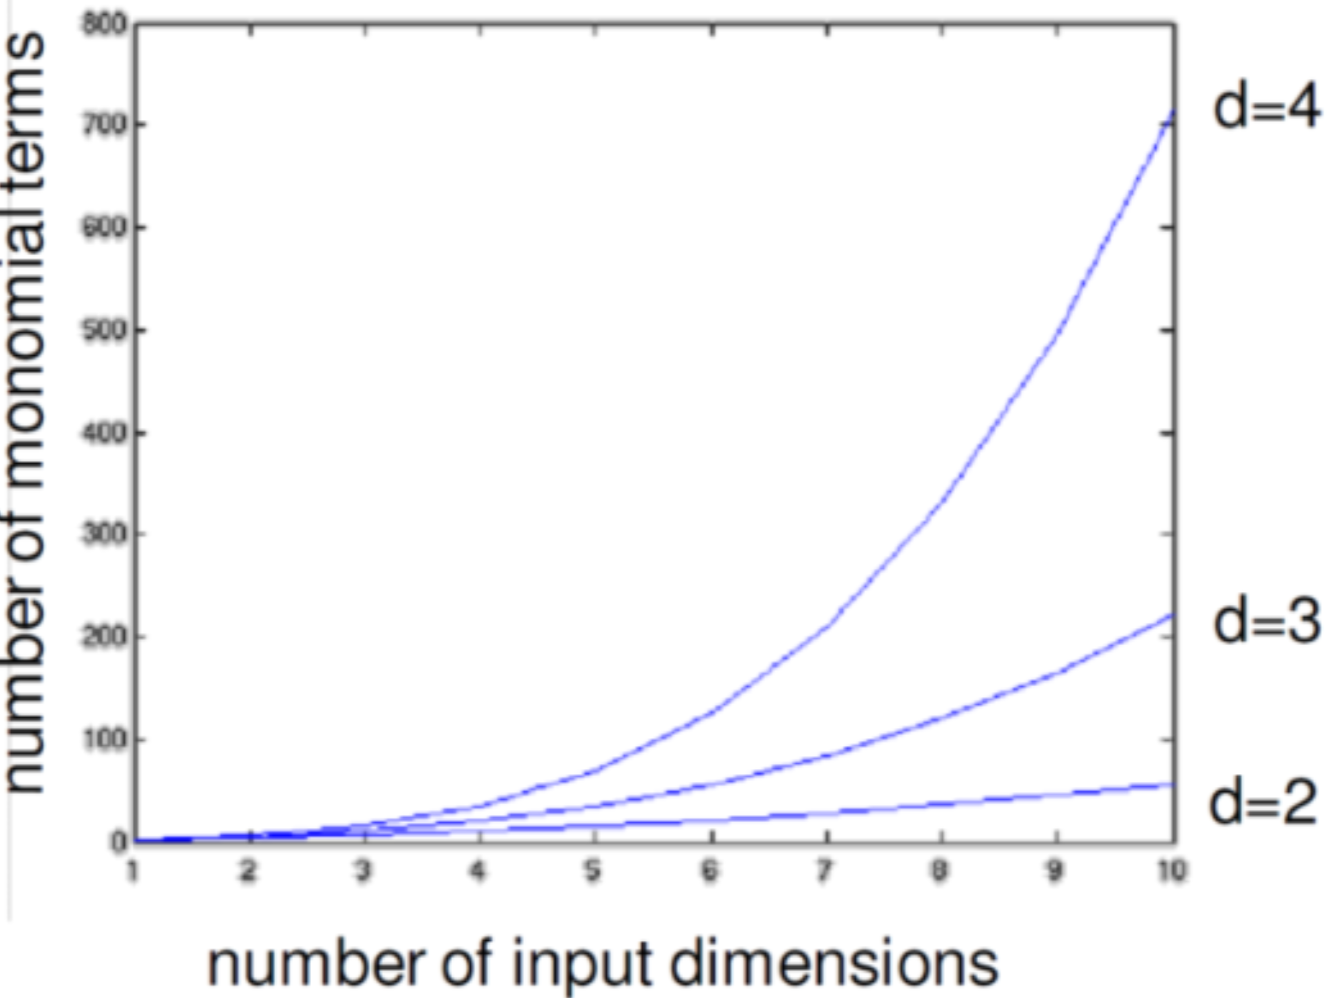
</div>

### Generic non-linear transformation of the features

In general, **any non-linear transformation of the features** can be advantageous, since account for the different moments of the features, as well as for their interactions.

Moreover, transforming and therefore adding features **projects the problem in a higher dimensional space** where it may be easier to tackle the original problem (e.g., data might become more linear, or linearly separable).  

E.g., original binary classification problem, with one single feature $x$: it is not linearly separable

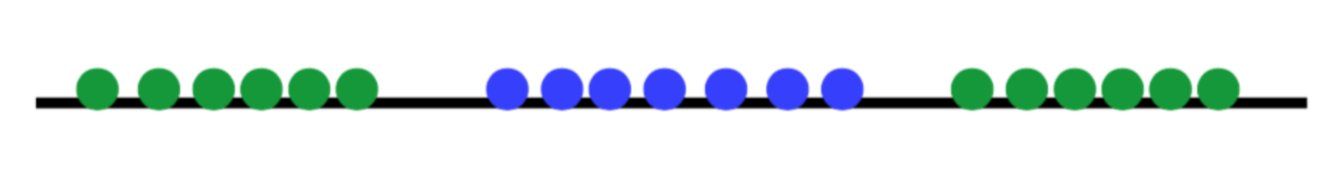

Operating the feature transformation: 
$$x\to {\bf z} = [z_1, z_2] = [x, x^2]$$

**The problem in the new two-dimensional feature space $\{z_1, z_2\}$ becomes linearly separable!**

<div>
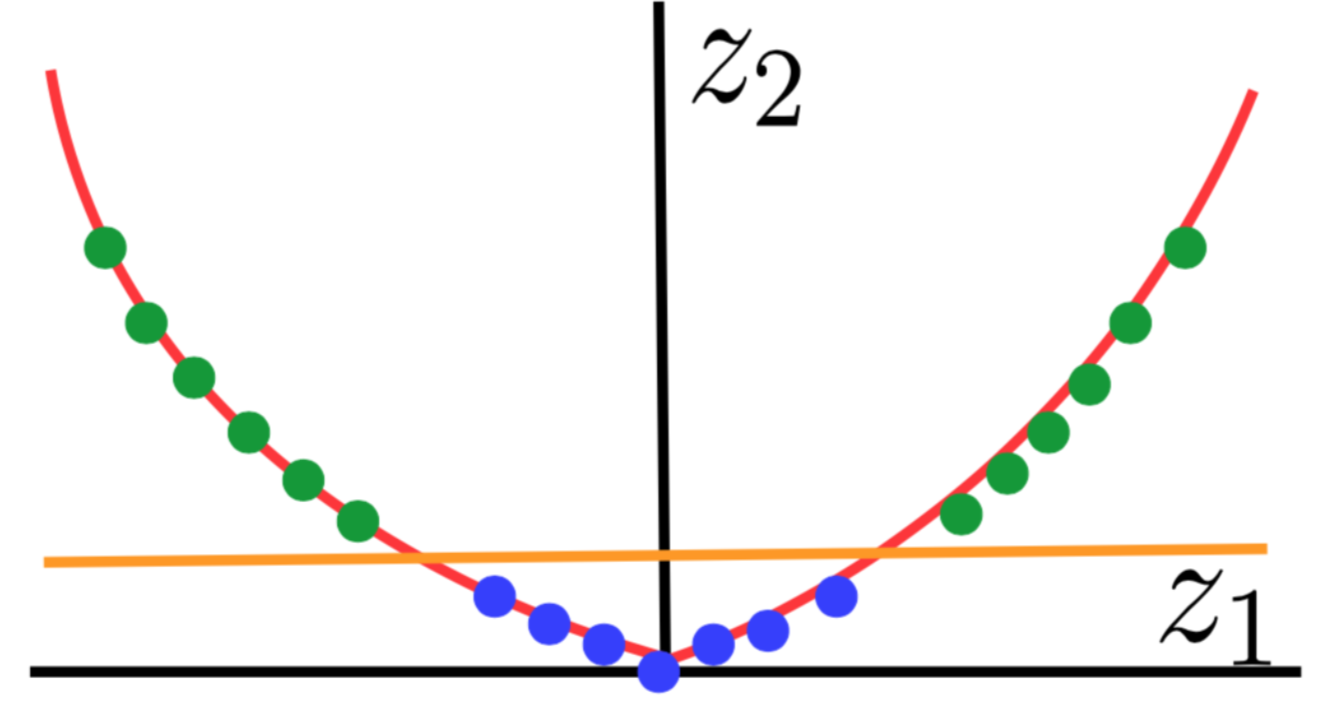
</div>

E.g., for the data below, the use of linear regression with the linear feature $x$ won't work well

<div>
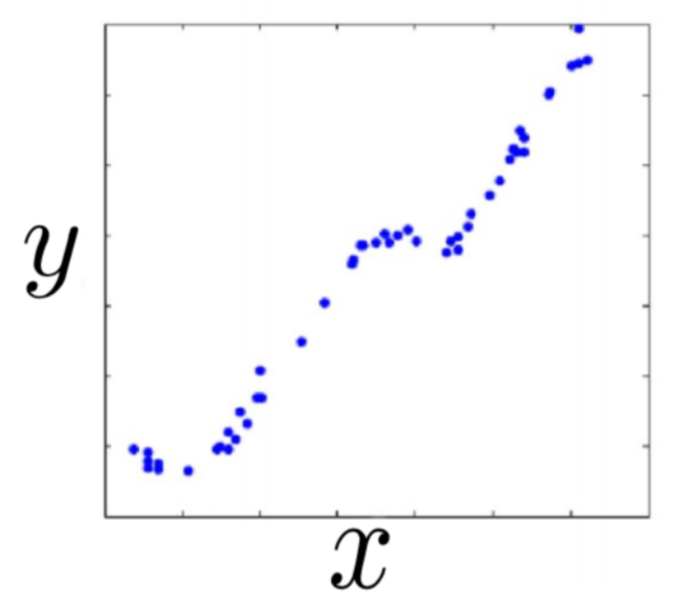
</div>

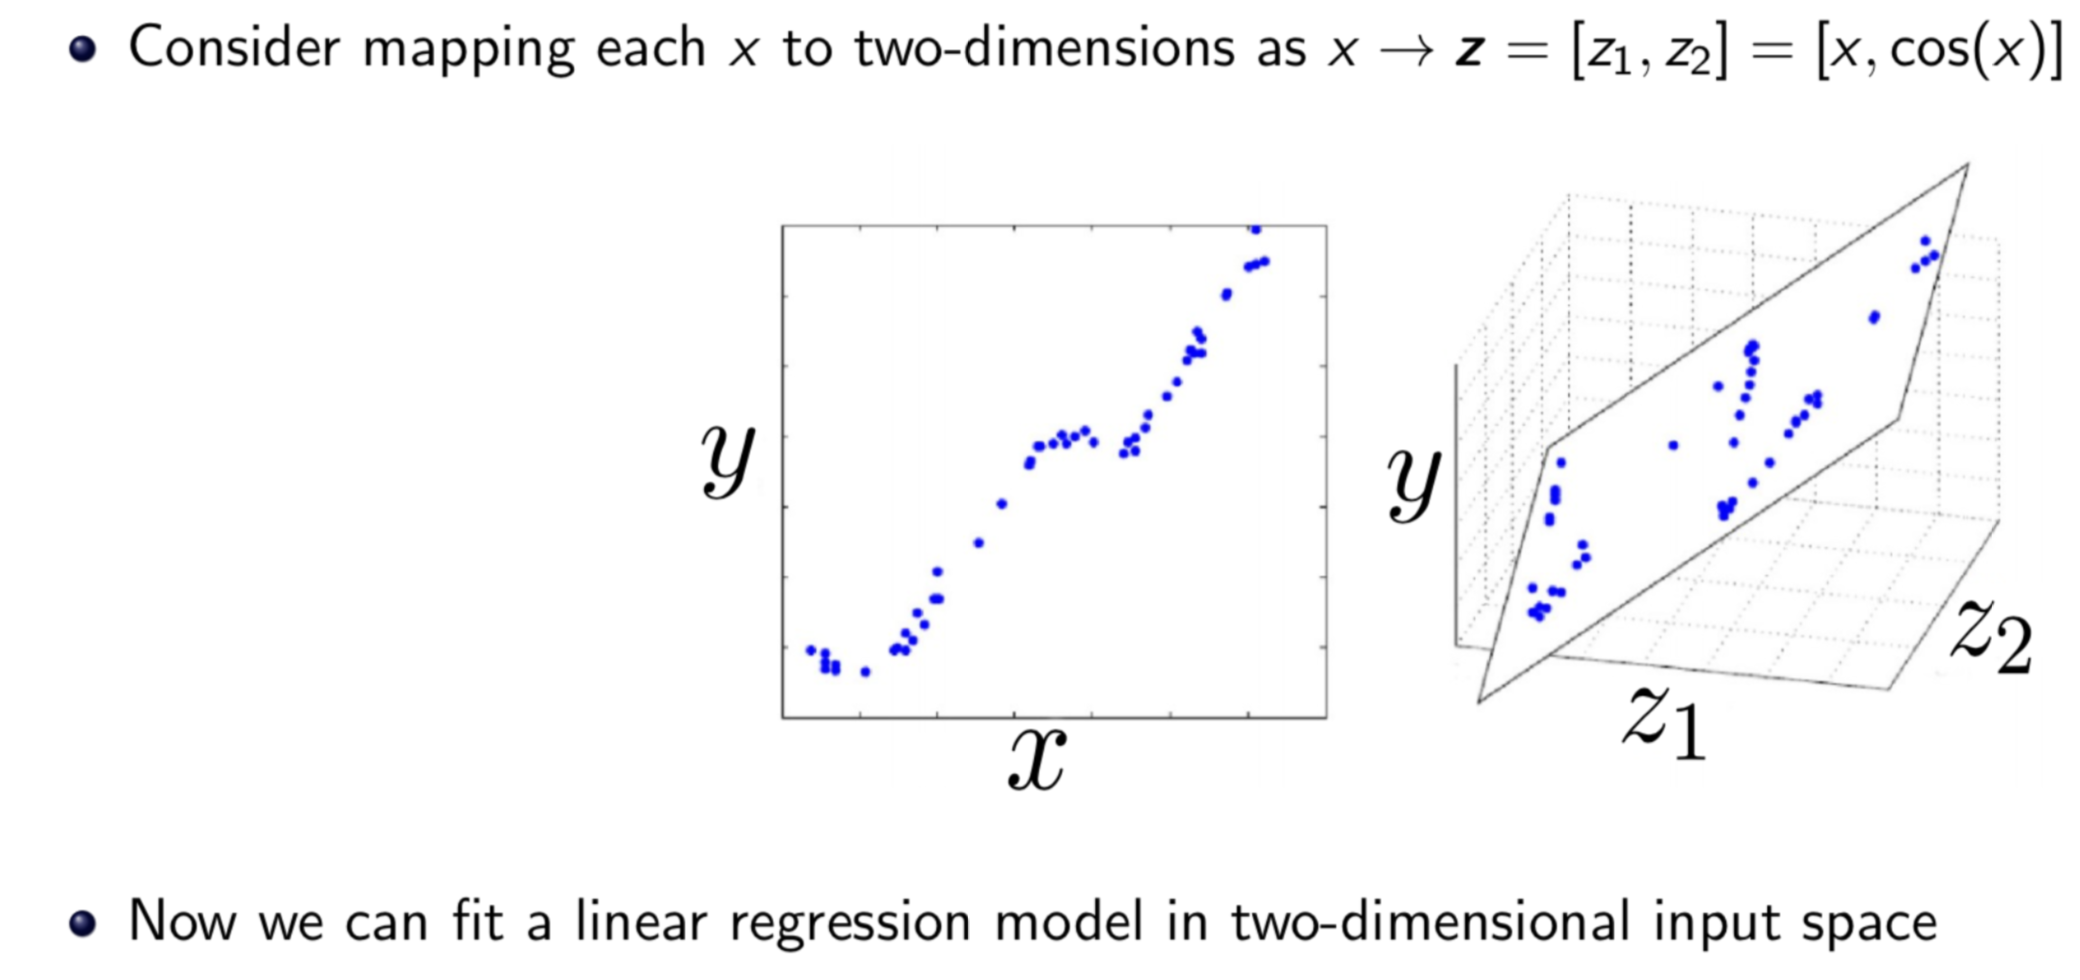

### Interaction in the Pokemon dataset (classification)

In [23]:
#Let's re-read the pokemon dataset
poke_df = pd.read_csv('../datasets/Pokemon.csv', encoding='utf-8')
poke_df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed Generation  Legendary  
0       65       65     45      Gen 1      False  
1       80       80     60      Gen 1      False  
2      100      100     80      Gen 1      False  
3      122      120     80      Gen 1      False  
4       60       50     65      Gen 1      False

Let's  build interaction features from the `Attack` and `Defense` features.

In [24]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

Attack  Defense
0      49       49
1      62       63
2      82       83
3     100      123
4      52       43

Let's consider features up to the
second degree using the `PolynomialFeatures` class from sklearn

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# define the object for dealing with the desired PF transformation
pf = PolynomialFeatures(degree=2, 
                        interaction_only=False, 
                        include_bias=False)

In [27]:
# tranform the features accoding to pf specifications
interaction_features = pf.fit_transform(atk_def)

In [28]:
pf.powers_

array([[1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

In [29]:
interaction_features

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [30]:
interaction_features.shape

(800, 5)

We have now a total of five features including the new interaction
features. 

We can nicely check the degree of each feature in the matrix using `powers_` again:

In [31]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

Attack_degree  Defense_degree
0              1               0
1              0               1
2              2               0
3              1               1
4              0               2

Based on the above information, we can assign a
name to each feature as follows to get the updated feature set:

In [32]:
if interaction_features.shape[1] > 0:
    interaction_features = pd.DataFrame(interaction_features,
                                        columns=['Attack', 'Defense', 
                                                 'Attack^2', 'Attack x Defense', 'Defense^2'])
    interaction_features.head()

## Does the polynomial transformation work (always)?

### Split the data in training and testing

In [33]:
#features = atk_def
features = interaction_features

targets = poke_df['Type 1']

training_frac = int(poke_df.shape[0] * 0.75)

# training
features_train = features[0:training_frac]
targets_train = targets[0:training_frac]

# testing
features_test = features[training_frac:]
targets_test = targets[training_frac:]

print(features_train.shape, targets_train.shape, 
      features_test.shape, targets_test.shape)

(600, 5) (600,) (200, 5) (200,)


### K-NN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_num = 5 #just a reasonable guess
weighting_opts = ['uniform', 'distance']
weights = weighting_opts[0]
classifier = KNeighborsClassifier(n_neighbors=neighbors_num, weights=weights)

In [35]:
# Fit the classifier to the training data
classifier.fit(features_train, targets_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
# Print out the empirical accuracy on the training data
prediction = classifier.predict(features_test)
mean_accuracy = np.mean(prediction == targets_test)
print(mean_accuracy)

classifier.score(features_test, targets_test)

0.095


0.095

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0).fit(features_train, targets_train)

prediction = classifier.predict(features_test)

mean_accuracy = np.mean(prediction == targets_test)
print(mean_accuracy)

#classifer.predict_proba(X[:2, :])
classifier.score(features_test, targets_test)


0.115


0.115

## Polynomial features, Multiple Linear regression, `sklearn` tools

### Boston house price dataset (regression)

In [38]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
features = boston.data
targets = boston.target
columns = boston.feature_names
#print(boston)
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [39]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

The prices of the house indicated by the variable `MEDV` which is the **target variable** and the remaining are the feature variables based on which we can predict the value of a house.

Let's transfer the data into a DataFrame check correlation among features and with the target

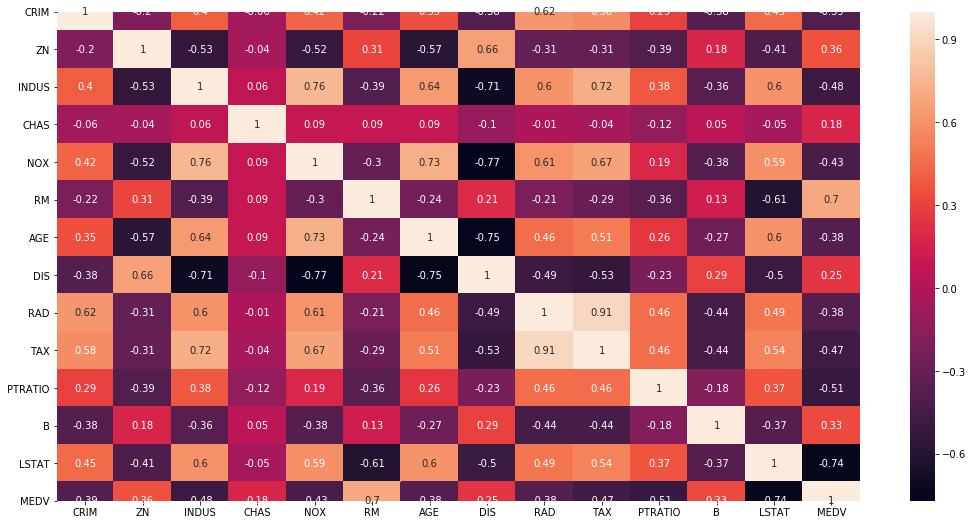

In [40]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

import seaborn as sn

plt.figure(figsize = (18,9))
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
sn.heatmap(data=correlation_matrix, annot=True)

- To fit a linear regression model, we select those features which have a high correlation with our target variable `MEDV`. <br><p>

- By looking at the correlation matrix we can see that `RM` has a strong positive correlation with `MEDV` (0.7) where `LSTAT` has a high negative correlation with `MEDV` (-0.74).

- An important point in selecting features for a linear regression model is to check for **multi-collinearity.** 

    The features `RAD`, `TAX` have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features `DIS` and `AGE` which have a correlation of -0.75.

**Based on the above observations we select `RM` and `LSTAT` as features.**

### Split the dataset in training and testing

Let's split the available data: 75% stays as training, 25% will be used for testing

In [41]:
features = boston_df[['RM', 'LSTAT']]
targets = boston_df[['MEDV']]

training_frac = int(boston_df.shape[0] * 0.75)

# training
features_train = features[0:training_frac]
targets_train = targets[0:training_frac]

# testing
features_test = features[training_frac:]
targets_test = targets[training_frac:]

print(features_train.shape, targets_train.shape, 
      features_test.shape, targets_test.shape)

(379, 2) (379, 1) (127, 2) (127, 1)


### Multiple Linear regression with Ordinary Least Squares

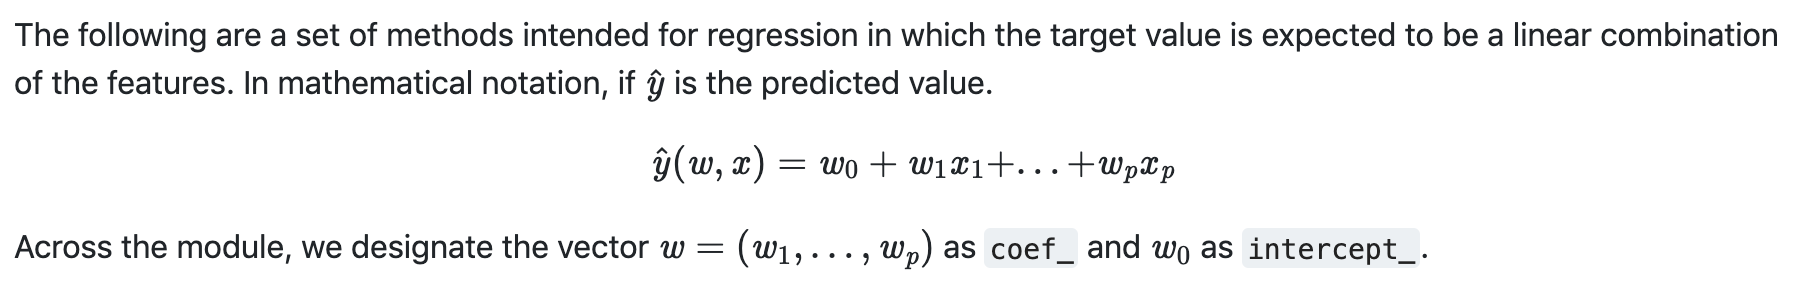

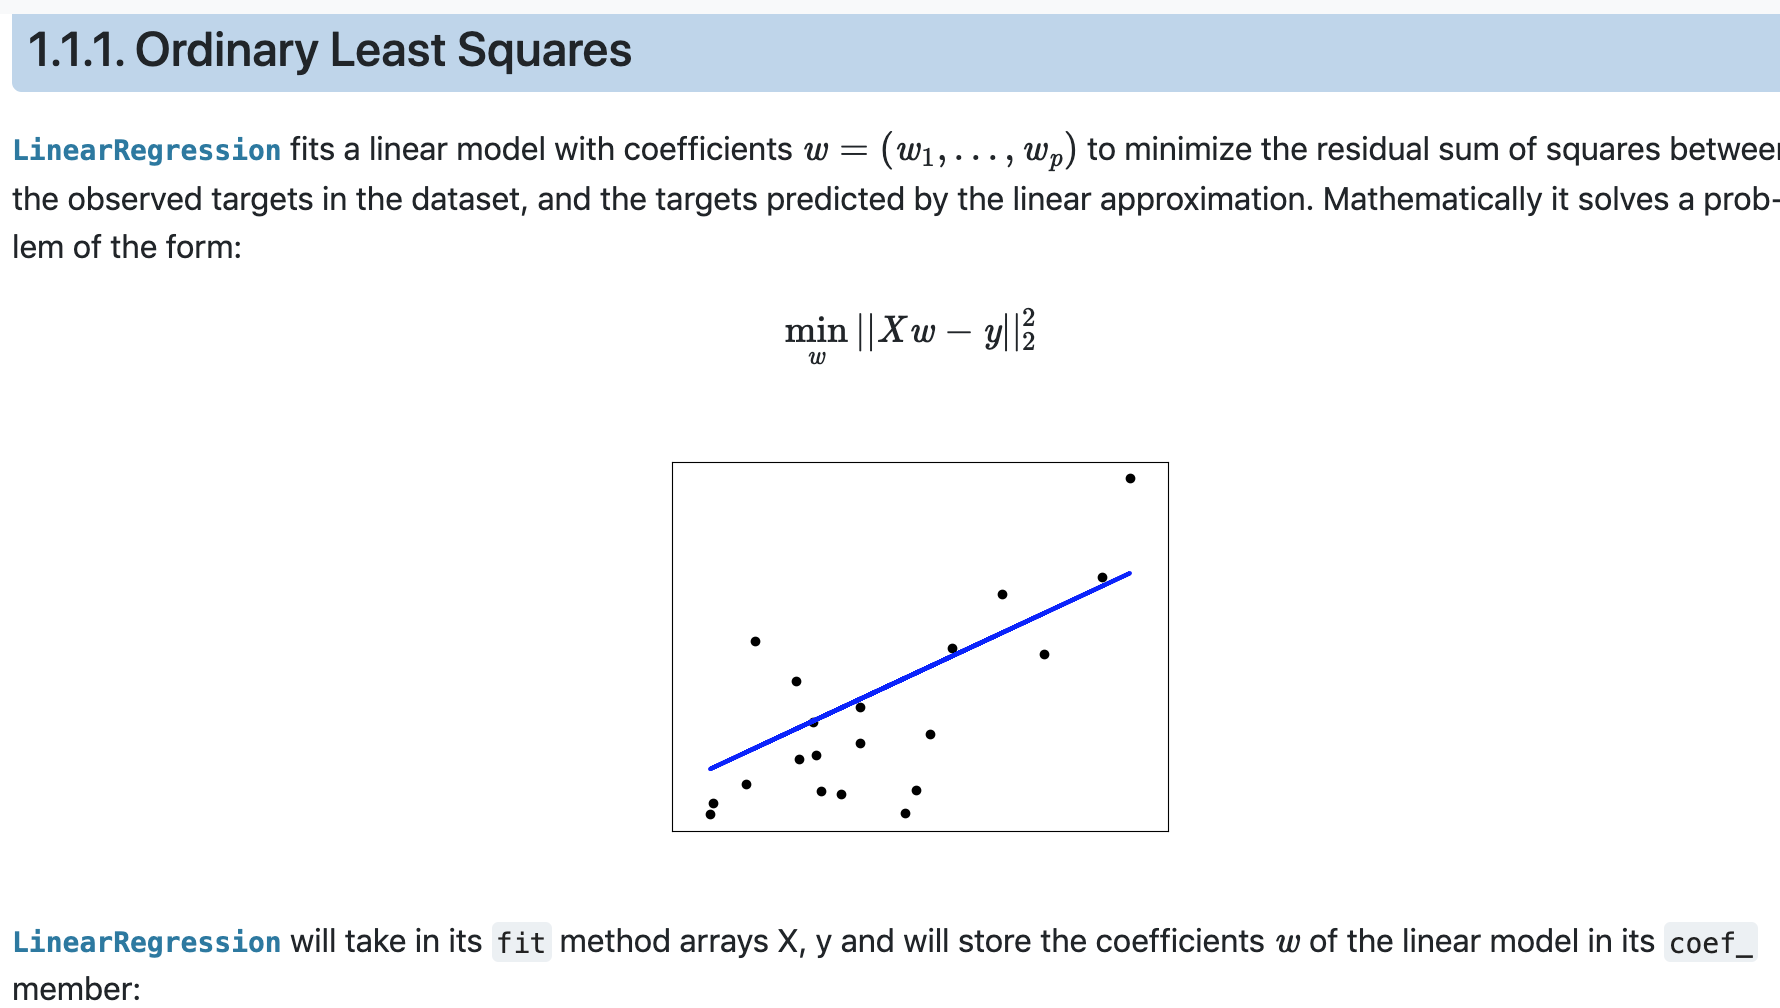

In [42]:
from sklearn import linear_model 

In [43]:
# Create linear regression object
OLS = linear_model.LinearRegression()

# Train the model using the training sets
OLS.fit(features_train, targets_train)

# The coefficients
print('Model Coefficients: \n', OLS.coef_,OLS.intercept_)

Model Coefficients: 
 [[ 6.88729902 -0.43583755]] [-14.20763993]


In [44]:
# Make predictions using the test set
targets_pred = OLS.predict(features_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(targets_pred,
                                                             targets_test)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.2f}'.format(r2_score(targets_test,
                                                             targets_pred)))
      

Mean squared error: 45.37
Coefficient of determination: -0.57


In [47]:
# The weights of the features as learned by the training
OLS.coef_

array([[ 6.88729902, -0.43583755]])

Let's show the **importance of the features** based on the weights

Text(0.5, 0, 'Importance')

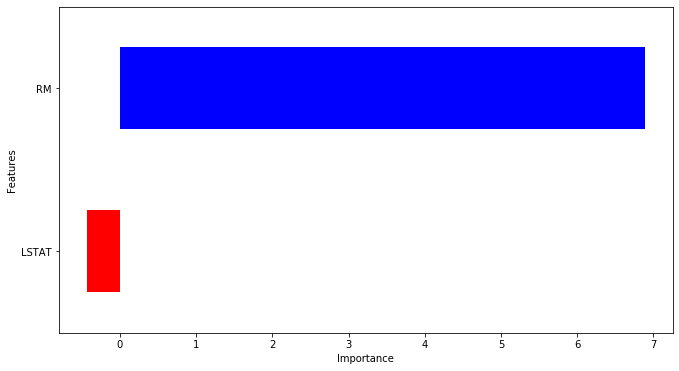

In [48]:
labels = ['RM', 'LSTAT']

features = pd.DataFrame()
features['Features'] = labels

features['importance'] = OLS.coef_[0]
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),
                         color = features.positive.map({True: 'blue', 
                                                        False: 'red'}))
plt.xlabel('Importance')

### OLS with polynomial features

In [49]:
from sklearn.preprocessing import PolynomialFeatures

print(features_train.shape)

poly = PolynomialFeatures(degree=2, include_bias=False)

features_train_poly = poly.fit_transform(features_train)

features_train_poly.shape

(379, 2)


(379, 5)

In [50]:
# Create linear regression object
OLS = linear_model.LinearRegression()

# Train the model using the training sets
OLS.fit(features_train_poly, targets_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Make predictions using the test set
features_test_poly = poly.fit_transform(features_test)

targets_pred = OLS.predict(features_test_poly)


In [52]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(targets_pred,
                                                             targets_test)))

print('Coefficient of determination: {:.2f}'.format(r2_score(targets_test,
                                                             targets_pred)))

Mean squared error: 28.45
Coefficient of determination: 0.02


Let's show the **importance of the features** based on the weights

In [53]:
# How the features are trasnformed, degress of power transforms
poly.powers_

array([[1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

Text(0.5, 0, 'Importance')

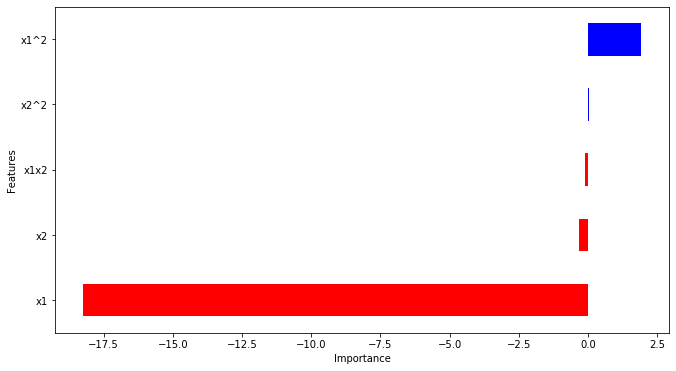

In [54]:
labels = ['x1', 'x2', 'x1^2', 'x1x2', 'x2^2']

features = pd.DataFrame()
features['Features'] = labels

features['importance'] = OLS.coef_[0]
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),
                         color = features.positive.map({True: 'blue', 
                                                        False: 'red'}))
plt.xlabel('Importance')

### Automate the processes using  `pipeline`

A `pipeline` consists in <u>sequentially applying a list of transforms and a final estimator.</u> 

Intermediate steps of the pipeline must be `transforms`, that is, they must implement fit and transform methods. 

The final estimator only needs to implement fit.

**The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.**

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', linear_model.LinearRegression())])

The string labels naming the components, allow to transparently refer to the attributes and methods of the pipeline components later on in the code

In [57]:
trained_model = model.fit(features_train, targets_train)

In [58]:
trained_model.named_steps['linear'].coef_.shape

(1, 6)

In [59]:
# Make predictions using the test set

# This time there's no need to manually transform the features
# since the Pipeline object 'knows' what to do with input features
#
targets_pred = trained_model.predict(features_test)


In [60]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(targets_pred,
                                                             targets_test)))

print('Coefficient of determination: {:.2f}'.format(r2_score(targets_test,
                                                             targets_pred)))

Mean squared error: 28.45
Coefficient of determination: 0.02
